In [35]:
# Neural Network Code by Shuba

In [36]:
#Importing Libraries

import torch
import pandas as pd
from torch.autograd import Variable
#import torch.nn.functional as F
import torch.utils.data as Data
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import imageio
# the file is saved in the local drive
# used data file from the local drive
import os 

In [37]:
# Load and Process Data

cwd = os.getcwd()
temp_demand_data = pd.read_csv('/Users/shuba/Documents/Personal Documents/SD Documents/1 - UNSW - Master of Data Science/MDS - Aug 2021/ZZSC9020 Data Science Project/Code/Demand_Temperature_Data.csv') 

# creating tensor from targets_df 
y = torch.tensor([temp_demand_data['TOTALDEMAND'].values])
x = torch.tensor([temp_demand_data['TEMPERATURE'].values])

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

In [38]:
# Printing the Value in x which has Temperature 
print(x)

tensor([[21.4000, 13.9000, 23.6000,  ..., 25.3000, 25.3000, 25.3000]],
       dtype=torch.float64)


In [39]:
# Printing the Value in y which has Temperature 
print(y)

tensor([[1417.4000, 1417.4000, 1417.4100,  ..., 5641.0300, 5641.7000,
         5655.3500]], dtype=torch.float64)


In [40]:
temp_demand_data.head()

,TOTALDEMAND,TEMPERATURE
0,1417.40,21.4
1,1417.40,13.9
2,1417.41,23.6
3,1417.41,26.4
4,1417.42,20.3


In [41]:
# Analyse the Temparature and Demand Data
temp_demand_data.describe().T

,count,mean,std,min,25%,50%,75%,max
TOTALDEMAND,503973.0,5103.026278,2573.729330,21.89,3219.05,5512.04,6901.01,13985.87
TEMPERATURE,503973.0,18.748056,6.112143,-1.30,14.20,18.90,23.10,44.70


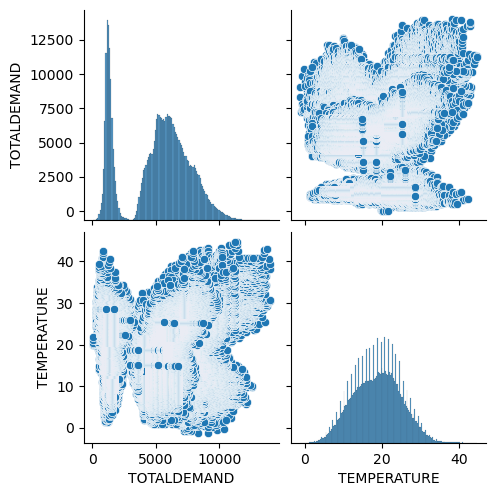

In [42]:
#Plot Temparature and Demand Data in Graph
sns.pairplot(temp_demand_data)
plt.show()

In [43]:
x = x.reshape((x.shape[1], 1))
y = y.reshape((y.shape[1], 1))

In [44]:
# Check Size of Input
x.size()



torch.Size([503973, 1])

In [45]:
# Check Size of Output
y.size()

torch.Size([503973, 1])

In [46]:

class MLP(torch.nn.Module):
    # Multilayer Perceptron for regression.
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(1, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 1)
        )
        
    def forward(self, x):
        #Forward pass
#         x = x.view(1, -1)
        return self.layers(x)

In [47]:
# # Apply Scaling of the Data 

# if not torch.is_tensor(x) and not torch.is_tensor(y):
#     # Apply scaling if necessary
#     if scale_data:
#         x = StandardScaler().fit_transform(x)
#     x = torch.from_numpy(x)
#     y = torch.from_numpy(y)

In [48]:
# Setting a fixed random seed.

torch.manual_seed(42)

# Prepare the Dataset
processed_dataset = Data.TensorDataset(x, y)

#Setting the Batch Size
BATCH_SIZE = 1000
    
loader = Data.DataLoader(
    dataset= processed_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=1)

In [49]:
 # Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = torch.nn.L1Loss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)


In [50]:
# Run the training loop
for epoch in range(0, 10): # 10 epochs at maximum
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    for i, data in enumerate(loader, 0):
        # Get and prepare inputs
        inputs, targets = data

        inputs, targets = inputs.float(), targets.float()
        
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Perform forward pass
        outputs = mlp(inputs)
        
        # Compute loss
        loss = loss_function(outputs, targets)
        
        # Perform backward pass
        loss.backward()
        
        
        # Perform optimization
        optimizer.step()
        
        # Print statistics
        current_loss += loss.item()
        if i % 10 == 0:
            print('Loss after mini-batch %5d: %.3f' %
                  (i + 1, current_loss / 500))
            current_loss = 0.0

Starting epoch 1
Loss after mini-batch     1: 10.611
Loss after mini-batch    11: 102.481
Loss after mini-batch    21: 101.566
Loss after mini-batch    31: 101.597
Loss after mini-batch    41: 101.767
Loss after mini-batch    51: 101.545
Loss after mini-batch    61: 101.981
Loss after mini-batch    71: 102.385
Loss after mini-batch    81: 102.558
Loss after mini-batch    91: 102.424
Loss after mini-batch   101: 102.422
Loss after mini-batch   111: 102.925
Loss after mini-batch   121: 101.847
Loss after mini-batch   131: 102.437
Loss after mini-batch   141: 101.962
Loss after mini-batch   151: 102.252
Loss after mini-batch   161: 101.667
Loss after mini-batch   171: 101.601
Loss after mini-batch   181: 101.267
Loss after mini-batch   191: 102.061
Loss after mini-batch   201: 101.498
Loss after mini-batch   211: 102.186
Loss after mini-batch   221: 101.871
Loss after mini-batch   231: 102.121
Loss after mini-batch   241: 101.961
Loss after mini-batch   251: 102.684
Loss after mini-batch 

Loss after mini-batch   221: 86.910
Loss after mini-batch   231: 87.442
Loss after mini-batch   241: 87.044
Loss after mini-batch   251: 85.638
Loss after mini-batch   261: 87.683
Loss after mini-batch   271: 85.148
Loss after mini-batch   281: 86.242
Loss after mini-batch   291: 86.003
Loss after mini-batch   301: 86.205
Loss after mini-batch   311: 85.856
Loss after mini-batch   321: 87.015
Loss after mini-batch   331: 85.926
Loss after mini-batch   341: 85.456
Loss after mini-batch   351: 85.654
Loss after mini-batch   361: 84.159
Loss after mini-batch   371: 86.019
Loss after mini-batch   381: 85.188
Loss after mini-batch   391: 85.232
Loss after mini-batch   401: 85.091
Loss after mini-batch   411: 84.498
Loss after mini-batch   421: 84.762
Loss after mini-batch   431: 84.005
Loss after mini-batch   441: 84.737
Loss after mini-batch   451: 82.794
Loss after mini-batch   461: 83.616
Loss after mini-batch   471: 83.251
Loss after mini-batch   481: 83.434
Loss after mini-batch   491:

Loss after mini-batch   451: 58.828
Loss after mini-batch   461: 59.199
Loss after mini-batch   471: 58.578
Loss after mini-batch   481: 59.228
Loss after mini-batch   491: 58.330
Loss after mini-batch   501: 58.379
Starting epoch 10
Loss after mini-batch     1: 5.951
Loss after mini-batch    11: 57.754
Loss after mini-batch    21: 58.192
Loss after mini-batch    31: 57.974
Loss after mini-batch    41: 57.907
Loss after mini-batch    51: 57.485
Loss after mini-batch    61: 57.685
Loss after mini-batch    71: 56.913
Loss after mini-batch    81: 57.063
Loss after mini-batch    91: 56.717
Loss after mini-batch   101: 56.918
Loss after mini-batch   111: 56.633
Loss after mini-batch   121: 56.548
Loss after mini-batch   131: 56.619
Loss after mini-batch   141: 56.279
Loss after mini-batch   151: 56.329
Loss after mini-batch   161: 55.791
Loss after mini-batch   171: 55.829
Loss after mini-batch   181: 55.379
Loss after mini-batch   191: 55.619
Loss after mini-batch   201: 55.285
Loss after 